In [1]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tidyr)
library(purrr) 
library(scales)
if (!require(extrafont)) install.packages("extrafont")
library(extrafont)

# 3. 폰트 로드
loadfonts()


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



다음의 패키지를 부착합니다: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose



다음의 패키지를 부착합니다: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


필요한 패키지를 로딩중입니다: extrafont

Registering fonts with R

cmex10 already registered with pdfFont().

cmmi10 already registered with pdfFont().

cmr10 already registered with pdfFont().

cmsy10 already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Condensed already registered with pdfFont().

DejaVu Sans Light already registered with pdfFont().

esint10 already registered with pdfFont().

eufm10 already registered with pdfFont().

Liberation Mono already registered with pdfF

# Load data

In [2]:
df <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/supple/UKB.DCR.varying-alpha.tsv",
    sep = '\t'
)
df %>% head()

pheno,lambda,weight,Vx_male_bigfam,lower_male_Vx,upper_male_Vx,Vx_female_bigfam,lower_female_Vx,upper_female_Vx,r,lower_r,upper_r,DCR_bigfam,Vx_male_gcta,lower_Vx_male,upper_Vx_male,Vx_female_gcta,lower_Vx_female,upper_Vx_female,DCR_gcta
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hand_grip_strength__left_,0.3082598,-1,0.028120096,6.194448e-05,0.068960681,0.049583607,0.0210166214,0.073321883,1,-1,1,0.5671249,0.00605859,0.001532726,0.01058446,0.006664700,0.002830292,0.01049911,0.9090567
Hand_grip_strength__left_,0.3082598,0,0.012344377,1.424603e-04,0.030939373,0.018756488,0.0076233964,0.031374327,1,-1,1,0.6581390,0.00605859,0.001532726,0.01058446,0.006664700,0.002830292,0.01049911,0.9090567
Hand_grip_strength__left_,0.3082598,1,0.004108955,3.518051e-06,0.014277353,0.005925045,0.0026328554,0.010593254,1,-1,1,0.6934892,0.00605859,0.001532726,0.01058446,0.006664700,0.002830292,0.01049911,0.9090567
Hand_grip_strength__left_,0.3082598,2,0.001705526,1.253098e-05,0.004957134,0.002044821,0.0008516356,0.003483356,1,-1,1,0.8340713,0.00605859,0.001532726,0.01058446,0.006664700,0.002830292,0.01049911,0.9090567
Arm_fat-free_mass__right_,0.6025213,-2,0.036544017,6.087865e-04,0.070395454,0.028818956,0.0017698849,0.049317839,-1,-1,1,1.2680549,0.01466950,0.009790133,0.01954888,0.007923873,0.003957212,0.01189053,1.8513048
Arm_fat-free_mass__right_,0.6025213,-1,0.025623753,2.978918e-03,0.067333240,0.019622977,0.0082854833,0.031759099,-1,-1,1,1.3058035,0.01466950,0.009790133,0.01954888,0.007923873,0.003957212,0.01189053,1.8513048


# plot theme

In [3]:
# 공통 테마 함수 정의
get_nature_theme <- function() {
    theme_bw() +
    theme(
        # 전체적인 배경
        panel.background = element_rect(fill = NA, color = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(color = "black", fill = NA, size = 0.6),  # size로 선 굵기 조절
        
        # panel.border = element_blank(),  
        
        # 축 설정
        # axis.line.x.top = element_line(color = "black", size = 0.3),  
        # axis.line.y.right = element_line(color = "black", size = 0.3),  
        # axis.line.x.bottom = element_line(color = "black", size = 0.3),  
        # axis.line.y.left = element_line(color = "black", size = 0.3),    
        axis.text = element_text(size = 6.5, color = "black"),
        axis.title = element_text(size = 7.5, color = "black"),
        axis.ticks = element_line(size = 0.3),
        axis.ticks.length = unit(0.8, "mm"),
        
        # 메인 figure에 박스 추가
        # plot.background = element_rect(color = "black", fill = NA),
        
        # legend 박스 제거
        legend.box.background = element_blank(),  # 이전: element_rect(color = "black")
        
        # 범례 설정
        legend.margin = margin(1, 1, 1, 1, unit = "mm"),
        # legend.spacing.y = unit(0.1, "cm"),
        
        # 여백 설정
        # plot.margin = unit(c(0.1, 0.2, 0.1, 0.1), "cm")
        plot.margin = margin(2, 4, 0, 1, unit = "mm")
    ) + 
    theme(
        # 기본 텍스트 설정
        text = element_text(),
        
        # 축 제목
        axis.title = element_text(size = 12),
        
        # 축 텍스트
        axis.text = element_text(size = 10),
        
        # 범례
        legend.text = element_text(size = 10),
        legend.title = element_text(size = 10),
        
        # 플롯 제목
        plot.title = element_text(size = 10, face = "bold"),
        
        # 축 설정
        axis.line = element_line(colour = "black", size = 0.5),
        axis.ticks = element_line(colour = "black", size = 0.5),
        
        # 패널 설정
        panel.grid = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
    )
}

# plot

In [4]:
# data.table을 사용하도록 수정
results <- df[, {
    # 각 weight 그룹별 데이터
    group_data <- .SD
    
    # 기본 통계량 계산
    base_stats <- list(
        correlation = cor(DCR_bigfam, DCR_gcta, use = "complete.obs"),
        mean_bigfam = mean(DCR_bigfam, na.rm = TRUE),
        mean_gcta = mean(DCR_gcta, na.rm = TRUE)
    )
    
    # 부트스트랩 CI 계산
    boot_results <- replicate(1000, {
        idx <- sample(1:.N, replace = TRUE)
        boot_data <- group_data[idx]
        list(
            correlation = cor(boot_data$DCR_bigfam, boot_data$DCR_gcta, use = "complete.obs"),
            mean_bigfam = mean(boot_data$DCR_bigfam, na.rm = TRUE),
            mean_gcta = mean(boot_data$DCR_gcta, na.rm = TRUE)
        )
    }, simplify = FALSE)
    
    # CI 계산
    cors <- sapply(boot_results, function(x) x$correlation)
    means_bigfam <- sapply(boot_results, function(x) x$mean_bigfam)
    means_gcta <- sapply(boot_results, function(x) x$mean_gcta)
    
    list(
        correlation = base_stats$correlation,
        cor_ci_lower = quantile(cors, 0.025, na.rm = TRUE),
        cor_ci_upper = quantile(cors, 0.975, na.rm = TRUE),
        mean_bigfam = base_stats$mean_bigfam,
        mean_bigfam_ci_lower = quantile(means_bigfam, 0.025, na.rm = TRUE),
        mean_bigfam_ci_upper = quantile(means_bigfam, 0.975, na.rm = TRUE),
        mean_gcta = base_stats$mean_gcta,
        mean_gcta_ci_lower = quantile(means_gcta, 0.025, na.rm = TRUE),
        mean_gcta_ci_upper = quantile(means_gcta, 0.975, na.rm = TRUE)
    )
}, by = weight]

# 결과 출력
results

weight,correlation,cor_ci_lower,cor_ci_upper,mean_bigfam,mean_bigfam_ci_lower,mean_bigfam_ci_upper,mean_gcta,mean_gcta_ci_lower,mean_gcta_ci_upper
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1,0.46312858,0.14522514,0.6794189,1.569274,1.393423,1.744535,1.774323,1.623918,1.917504
0,0.44216360,0.05248678,0.6998111,1.659483,1.478642,1.823885,1.810141,1.639747,1.971014
1,0.61256747,0.27206402,0.7999157,1.752257,1.543231,1.946644,1.732504,1.585667,1.878307
2,0.63689282,0.37229112,0.8359196,1.882524,1.669780,2.078474,1.781633,1.616823,1.920588
-2,0.09145509,-0.30557298,0.4594555,1.460530,1.289147,1.640867,1.831603,1.703285,1.972517
3,0.62370795,0.34768047,0.8286401,1.967136,1.764535,2.129947,1.832869,1.677851,2.001427
4,0.57689788,0.33236109,0.7852538,1.951185,1.753903,2.131180,1.832869,1.662112,2.002636
5,0.68963829,0.36077257,0.8458281,1.948573,1.773246,2.109647,1.855447,1.698378,2.021613
6,0.61265834,0.21423569,0.8295903,1.979110,1.809973,2.127955,1.855650,1.696233,2.032899


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


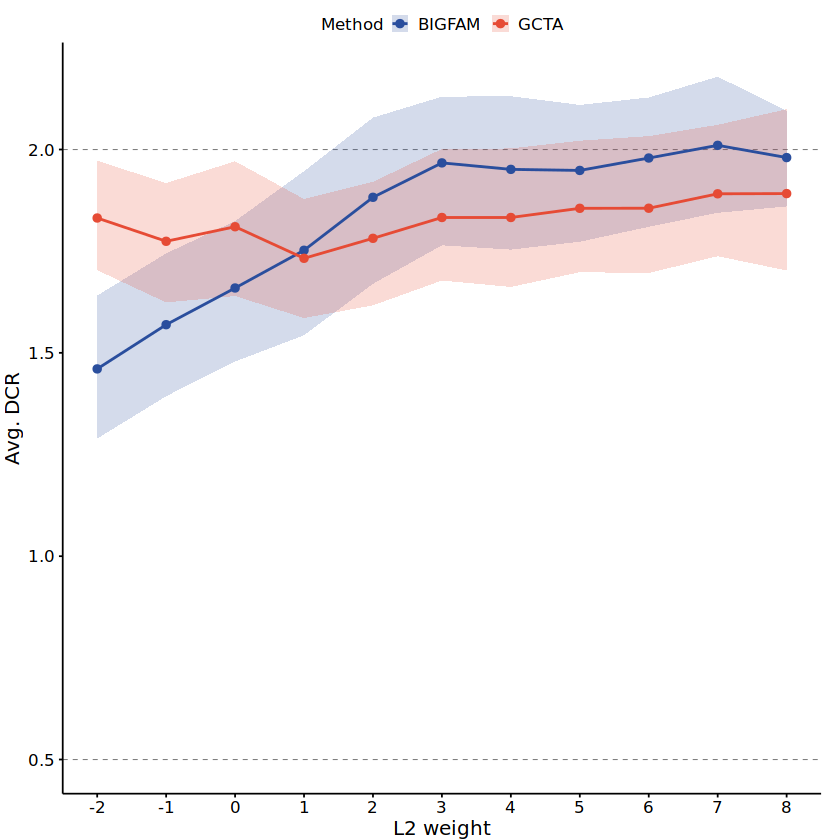

In [5]:
# 데이터 준비를 위해 긴 형태(long format)로 변환
results_long <- rbind(
    data.table(
        weight = results$weight,
        mean = results$mean_bigfam,
        ci_lower = results$mean_bigfam_ci_lower,
        ci_upper = results$mean_bigfam_ci_upper,
        method = "BIGFAM"
    ),
    data.table(
        weight = results$weight,
        mean = results$mean_gcta,
        ci_lower = results$mean_gcta_ci_lower,
        ci_upper = results$mean_gcta_ci_upper,
        method = "GCTA"
    )
)

# Nature Genetics 스타일의 색상
ng_colors <- c("BIGFAM" = "#2A4E9D", "GCTA" = "#E64B35")

# 플롯 생성
p <- ggplot(results_long, aes(x = weight, y = mean, color = method)) +
    # reference lines
    geom_hline(yintercept = c(0.5, 2), linetype = "dashed", color = "grey50", size = 0.3) +
    # 신뢰구간
    geom_ribbon(aes(ymin = ci_lower, ymax = ci_upper, fill = method), 
                alpha = 0.2, color = NA) +
    # 평균선
    geom_line(size = 0.8) +
    # 포인트
    geom_point(size = 2) +
    # 스타일링
    scale_color_manual(values = ng_colors) +
    scale_fill_manual(values = ng_colors) +
    scale_x_continuous(
        breaks = seq(-2, 8)
        # limits = c(1, 3),
        # expand = c(0.1, 0.1)
        ) + 
    get_nature_theme() +
    labs(
        x = paste0("L2 weight"),
        y = "Avg. DCR",
        color = "Method",
        fill = "Method"
    ) +
    theme(
        legend.position = "top",
        legend.box.spacing = unit(1, "mm"),
        legend.key.size = unit(4, "mm")
    )

# 플롯 출력
print(p)


In [6]:
# 저장 (필요한 경우)
ggsave(
    filename = "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/X.DCR.BIGFAM-vs-GCTA.varying-alpha.pdf",
    plot = p,
    width = 85,
    height = 46,
    units = "mm",
    dpi = 300
)

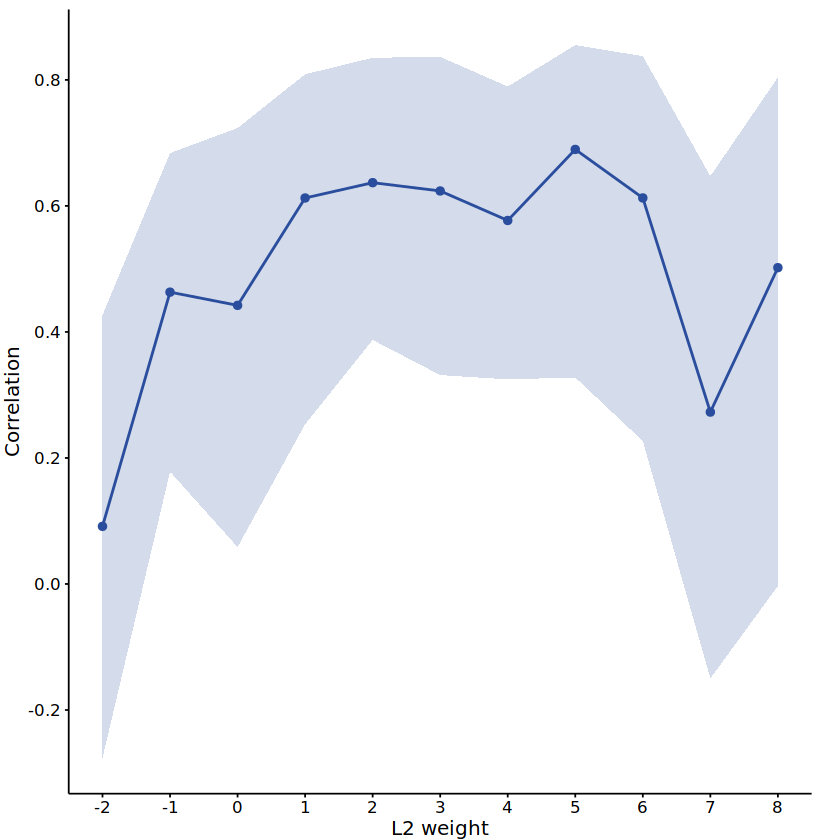

In [31]:
# correlation 플롯 생성
p_cor <- ggplot(results, aes(x = weight, y = correlation)) +
    # 신뢰구간
    geom_ribbon(aes(ymin = cor_ci_lower, ymax = cor_ci_upper),
                fill = "#2A4E9D", alpha = 0.2) +
    # 상관계수 선
    geom_line(color = "#2A4E9D", size = 0.8) +
    # 포인트
    geom_point(color = "#2A4E9D", size = 2) +
    # 스타일링
    get_nature_theme() +
    labs(
        x = "L2 weight",
        y = "Correlation"
    ) +
    scale_y_continuous(
        breaks = scales::pretty_breaks(),
        # limits = c(1, 3),
        # expand = c(0.1, 0.1)
        ) + 
    scale_x_continuous(
        breaks = seq(-2, 8)
        # limits = c(1, 3),
        # expand = c(0.1, 0.1)
        ) + 
    theme(
        plot.margin = margin(t = 2, r = 6, b = 0, l = 1, unit = "mm"),
        axis.text = element_text(size = 10)
    )

# 플롯 출력
print(p_cor)

In [32]:
# 저장 (필요한 경우)
ggsave(
    filename = "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/X.DCR-correlation.varying-alpha.pdf",
    plot = p_cor,
    width = 85,
    height = 46,
    units = "mm",
    dpi = 300
)